# Tesla and GameStop Financial Dashboard Assignment

This notebook solves the assignment questions on extracting stock and revenue data for Tesla and GameStop using `yfinance` and web scraping.

In [1]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

plt.style.use('fivethirtyeight')

# Helper function for plotting
def make_graph(stock_data, revenue_data, title):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    
    # Plot stock price
    ax[0].plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax[0].set_title(f"{title} Stock Price")
    ax[0].set_ylabel("Stock Price ($)")
    ax[0].legend()
    
    # Plot revenue
    ax[1].plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color='orange')
    ax[1].set_title(f"{title} Revenue")
    ax[1].set_ylabel("Revenue ($)")
    ax[1].legend()
    
    plt.xticks(rotation=45)
    plt.show()


## Question 1 - Extract Tesla Stock Data using yfinance

In [2]:

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv('tesla_data.csv', index=False)

print("Tesla Stock Data:")
print(tesla_data.head())


Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2 - Extract Tesla Revenue Data using Webscraping

In [3]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all('table')

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue != '':
                    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

tesla_revenue.to_csv('tesla_revenue.csv', index=False)
print("Tesla Revenue Data:")
print(tesla_revenue.tail())


Tesla Revenue Data:
Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3 - Extract GameStop Stock Data using yfinance

In [4]:

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv('gme_data.csv', index=False)

print("GameStop Stock Data:")
print(gme_data.head())


GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4 - Extract GameStop Revenue Data using Webscraping

In [5]:

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables_gme = soup_gme.find_all('table')

for table in tables_gme:
    if "GameStop Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue != '':
                    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue.to_csv('gme_revenue.csv', index=False)
print("GameStop Revenue Data:")
print(gme_revenue.tail())

GameStop Revenue Data:
Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 5 - Tesla Stock and Revenue Dashboard

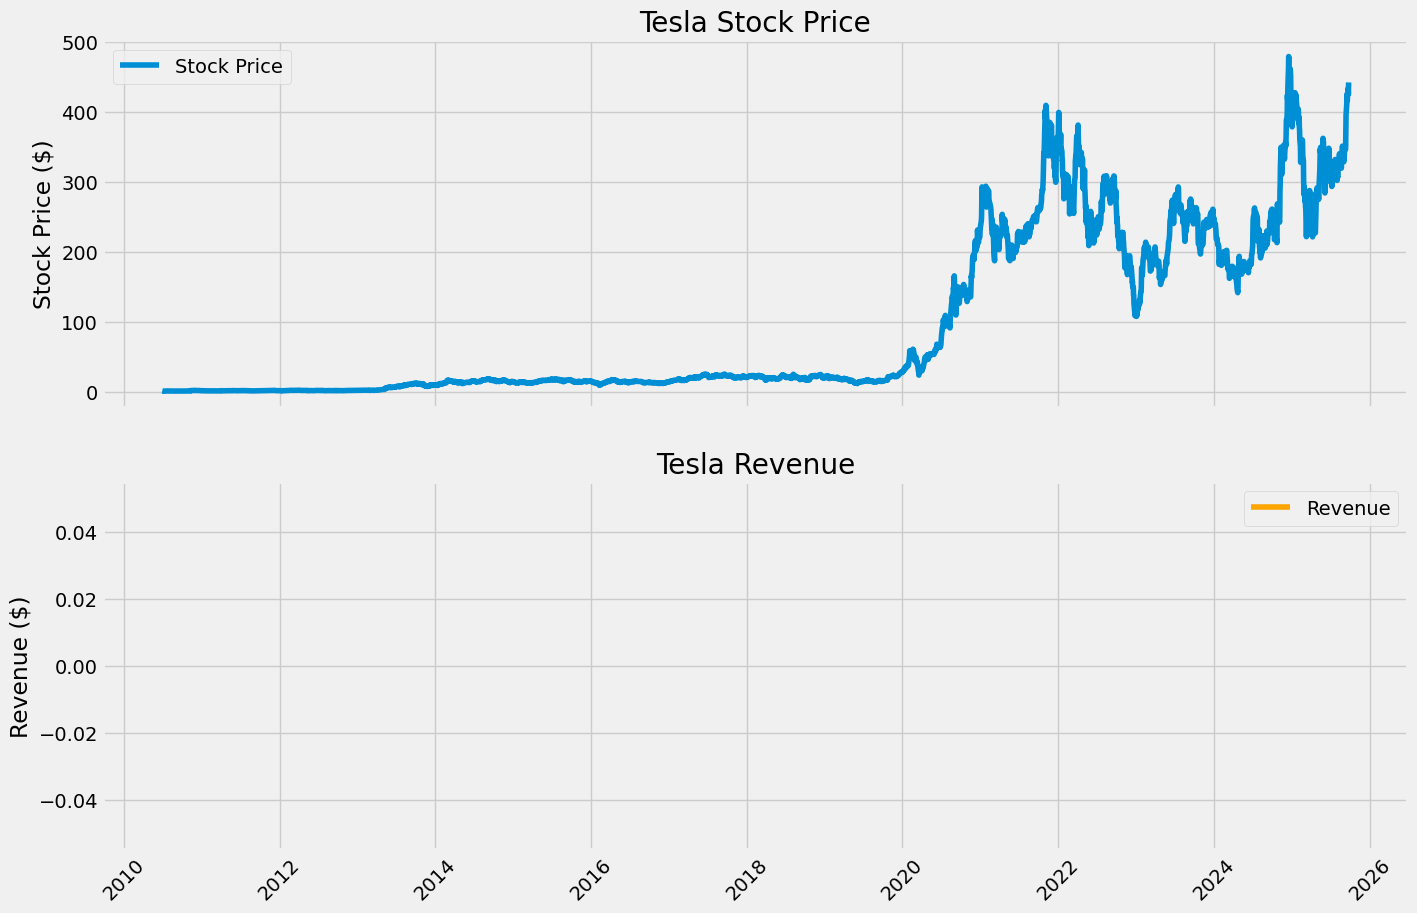

In [6]:

make_graph(tesla_data, tesla_revenue, "Tesla")


## Question 6 - GameStop Stock and Revenue Dashboard

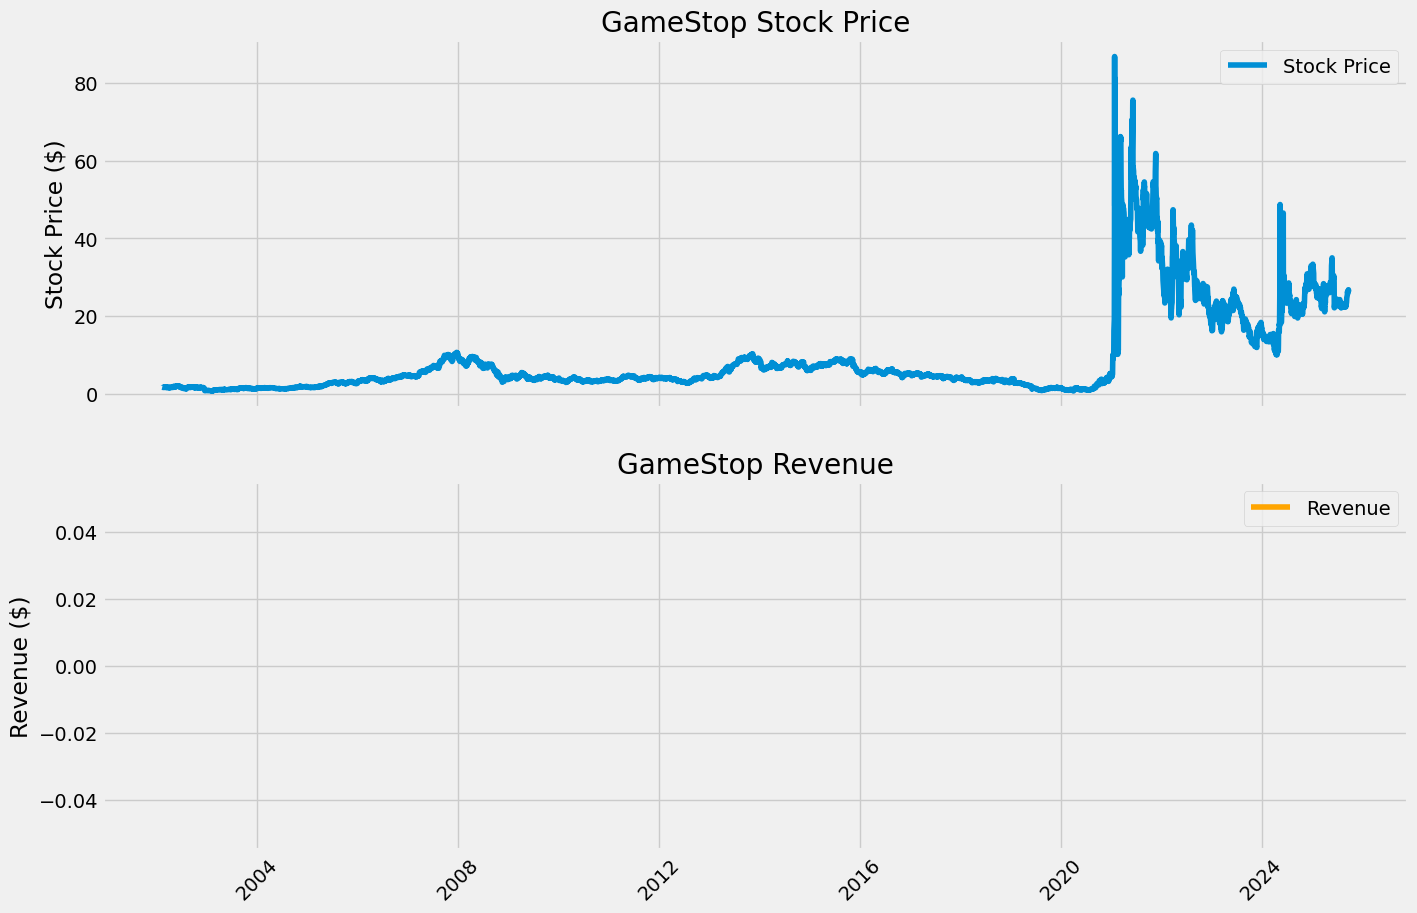

In [7]:

make_graph(gme_data, gme_revenue, "GameStop")


## Question 7 - Sharing the Assignment Notebook

In [8]:

print("Save this notebook as 'Tesla_GME_Dashboard_Assignment.ipynb' and upload it for submission.")


Save this notebook as 'Tesla_GME_Dashboard_Assignment.ipynb' and upload it for submission.
